In [ ]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('/content/drive/MyDrive/ds_Yatendra/csv_files/fear_greed_index.csv')
data2 = pd.read_csv('/content/drive/MyDrive/ds_Yatendra/csv_files/historical_data.csv')

In [3]:
data2.value_counts()

Account                                     Coin  Execution Price  Size Tokens  Size USD  Side  Timestamp IST     Start Position  Direction    Closed PnL  Transaction Hash                                                    Order ID     Crossed  Fee       Trade ID      Timestamp   
0x083384f897ee0f19899168e3b1bec365f52a9012  ETH   1570.10          0.0078       12.25     BUY   12-04-2025 12:21  -420.2293       Close Short  5.658978    0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  False    0.001224  6.830000e+14  1.740000e+12    1
                                                                                                12-04-2025 12:22  -313.3401       Close Short  5.658978    0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  False    0.001224  6.900000e+14  1.740000e+12    1
                                                                                                12-04-2025 12:31  -311.9386       Close Short  5

In [4]:
nulls_data1 = data1.isnull().sum().sum()
nulls_data2 = data2.isnull().sum().sum()
print(f"Null values in data1 (fear_greed_index.csv): {nulls_data1}")
print(f"Null values in data2 (historical_data.csv): {nulls_data2}")

Null values in data1 (fear_greed_index.csv): 0
Null values in data2 (historical_data.csv): 0


In [5]:
# Count and mean value of each classification in data1
classify_stats = data1.groupby('classification')['value'].agg(['count', 'mean']).reset_index()
classify_stats.columns = ['classification', 'count', 'mean_value']
print(classify_stats)

  classification  count  mean_value
0   Extreme Fear    508   18.273622
1  Extreme Greed    326   82.116564
2           Fear    781   34.184379
3          Greed    633   65.846761
4        Neutral    396   49.964646


In [6]:
# Classify sentiment in data1 based on value
def classify_sentiment(val):
    if val <= 20:
        return 'Extreme Fear'
    elif val <= 40:
        return 'Fear'
    elif val <= 54:
        return 'Neutral'
    elif val <= 74:
        return 'Greed'
    else:
        return 'Extreme Greed'

data1['classification_by_value'] = data1['value'].apply(classify_sentiment)
data1[['value', 'classification', 'classification_by_value']].head()
data1.head(15)

,timestamp,value,classification,date,classification_by_value
0,1517463000,30,Fear,2018-02-01,Fear
1,1517549400,15,Extreme Fear,2018-02-02,Extreme Fear
2,1517635800,40,Fear,2018-02-03,Fear
3,1517722200,24,Extreme Fear,2018-02-04,Fear
4,1517808600,11,Extreme Fear,2018-02-05,Extreme Fear
5,1517895000,8,Extreme Fear,2018-02-06,Extreme Fear
6,1517981400,36,Fear,2018-02-07,Fear
7,1518067800,30,Fear,2018-02-08,Fear
8,1518154200,44,Fear,2018-02-09,Neutral
9,1518240600,54,Neutral,2018-02-10,Neutral


In [7]:
!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


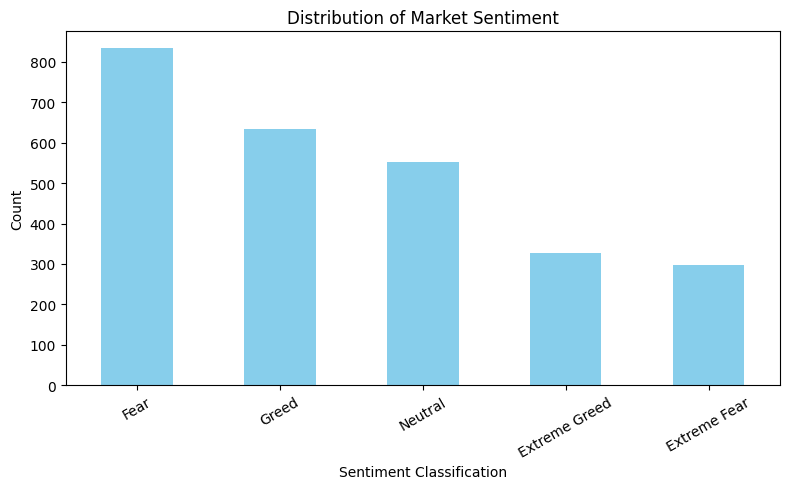

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
data1['classification_by_value'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Split Timestamp IST into separate date and time columns, drop Timestamp IST

In [9]:
dt = pd.to_datetime(data2['Timestamp IST'], errors='coerce')
data2['date'] = dt.dt.strftime('%Y-%m-%d')
data2['time'] = dt.dt.strftime('%H:%M:%S')
data2 = data2.drop(columns=['Timestamp IST'])
data2.head(15)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,time
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,22:50:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,22:50:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,22:50:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,22:50:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,22:50:00
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12,2024-02-12,22:50:00
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12,2024-02-12,22:50:00
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12,2024-02-12,22:50:00
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12,2024-02-12,22:50:00
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12,2024-02-12,22:50:00


Merge data1 and data2 on date to combine sentiment and trading data

Analyze trading volume by sentiment

In [10]:
merged = pd.merge(data2, data1[['date', 'classification']], on='date', how='left')
merged.head()

volume_by_sentiment = merged.groupby('classification')['Size USD'].sum().reset_index()
print('Trading Volume by Sentiment:')
print(volume_by_sentiment)
volume_by_sentiment.to_csv('/content/drive/MyDrive/ds_Yatendra/csv_files/Volume-Sentiment.csv', sep='\t', index=True)

Trading Volume by Sentiment:
  classification     Size USD
0   Extreme Fear   9580240.04
1  Extreme Greed  18223760.27
2           Fear  79674391.06
3          Greed  57045815.74
4        Neutral  11939551.21


 Trade direction (BUY/SELL) by sentiment

In [11]:
direction_by_sentiment = merged.groupby(['classification', 'Side']).size().unstack(fill_value=0)
print('Trade Direction by Sentiment:')
print(direction_by_sentiment)
direction_by_sentiment.to_csv('/content/drive/MyDrive/ds_Yatendra/csv_files/Direction-Sentiment.csv', sep='\t', index=True)

Trade Direction by Sentiment:
Side             BUY  SELL
classification            
Extreme Fear    1168  1158
Extreme Greed   1661  3960
Fear            7307  6562
Greed           5407  5885
Neutral         1020  1736


Profitability by sentiment (if Closed PnL exists)

In [12]:
if 'Closed PnL' in merged.columns:
    pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean().reset_index()
    print('Average Profit/Loss by Sentiment:')
    print(pnl_by_sentiment)
direction_by_sentiment.to_csv('/content/drive/MyDrive/ds_Yatendra/csv_files/Profitability-Sentiment.csv', sep='\t', index=True)

Average Profit/Loss by Sentiment:
  classification  Closed PnL
0   Extreme Fear    1.891632
1  Extreme Greed  205.816345
2           Fear  128.287950
3          Greed   53.988003
4        Neutral   27.088803


Fee analysis by sentiment

In [13]:
if 'Fee' in merged.columns:
    fee_by_sentiment = merged.groupby('classification')['Fee'].mean().reset_index()
    print('Average Fee by Sentiment:')
    print(fee_by_sentiment)
fee_by_sentiment.to_csv('/content/drive/MyDrive/ds_Yatendra/csv_files/Fee-Sentiment.csv', sep='\t', index=True)    

Average Fee by Sentiment:
  classification       Fee
0   Extreme Fear  0.686479
1  Extreme Greed  0.835794
2           Fear  1.131521
3          Greed  1.092947
4        Neutral  0.922389


Coin-specific sentiment analysis

In [14]:
if 'Coin' in merged.columns:
    coin_sentiment = merged.groupby(['Coin', 'classification']).size().unstack(fill_value=0)
    print('Coin-Specific Sentiment Analysis:')
    print(coin_sentiment)
    coin_sentiment.to_csv('/content/drive/MyDrive/ds_Yatendra/csv_files/Coin-Sentiment.csv', sep='\t', index=True)

Coin-Specific Sentiment Analysis:
classification  Extreme Fear  Extreme Greed  Fear  Greed  Neutral
Coin                                                             
@1                         0              0     2      1        0
@10                        0              0     1      2        0
@103                       0              0     0      2        0
@107                      67           2395  1456   1911     1079
@11                        0              1     0      0        0
...                      ...            ...   ...    ...      ...
ZK                         0              4    16      4        2
ZRO                        1              0     0      1        0
kBONK                      7             46    26    199       99
kPEPE                     23             63    82     90       55
kSHIB                      0             10     1      3        0

[170 rows x 5 columns]


Time-of-day trading patterns

In [15]:
if 'time' in merged.columns:
    merged['hour'] = pd.to_datetime(merged['time'], errors='coerce').dt.hour
    hour_sentiment = merged.groupby(['hour', 'classification']).size().unstack(fill_value=0)
    print('Time-of-Day Trading Patterns by Sentiment:')
    print(hour_sentiment)
    hour_sentiment.to_csv('/content/drive/MyDrive/ds_Yatendra/csv_files/Hour-Sentiment.csv', sep='\t', index=True)

Time-of-Day Trading Patterns by Sentiment:
classification  Extreme Fear  Extreme Greed  Fear  Greed  Neutral
hour                                                             
0.0                       80            189   640    491      105
1.0                       32            135   424    880      135
2.0                       80            137   452    848      174
3.0                      115            181   683    667      215
4.0                      267            154   724    627       86
5.0                       98             62   398    440      169
6.0                       47            120   225    452       92
7.0                       98            114  1347    367       33
8.0                      211            244   650    655       45
9.0                       20             96   397    600       29
10.0                       8            360   526    469       56
11.0                       7            365   514    297      201
12.0                      10     

C:\Users\Yatendra Pachori\AppData\Local\Temp\ipykernel_156604\1914441775.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged['hour'] = pd.to_datetime(merged['time'], errors='coerce').dt.hour


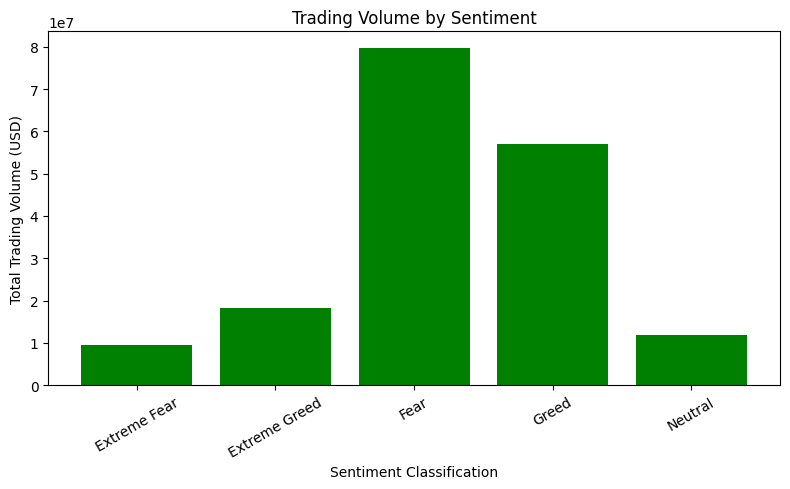

In [16]:
# Plot trading volume by sentiment using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(volume_by_sentiment['classification'], volume_by_sentiment['Size USD'], color='green')
plt.title('Trading Volume by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Total Trading Volume (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Plot all sentiment analyses in one frame using matplotlib subplots

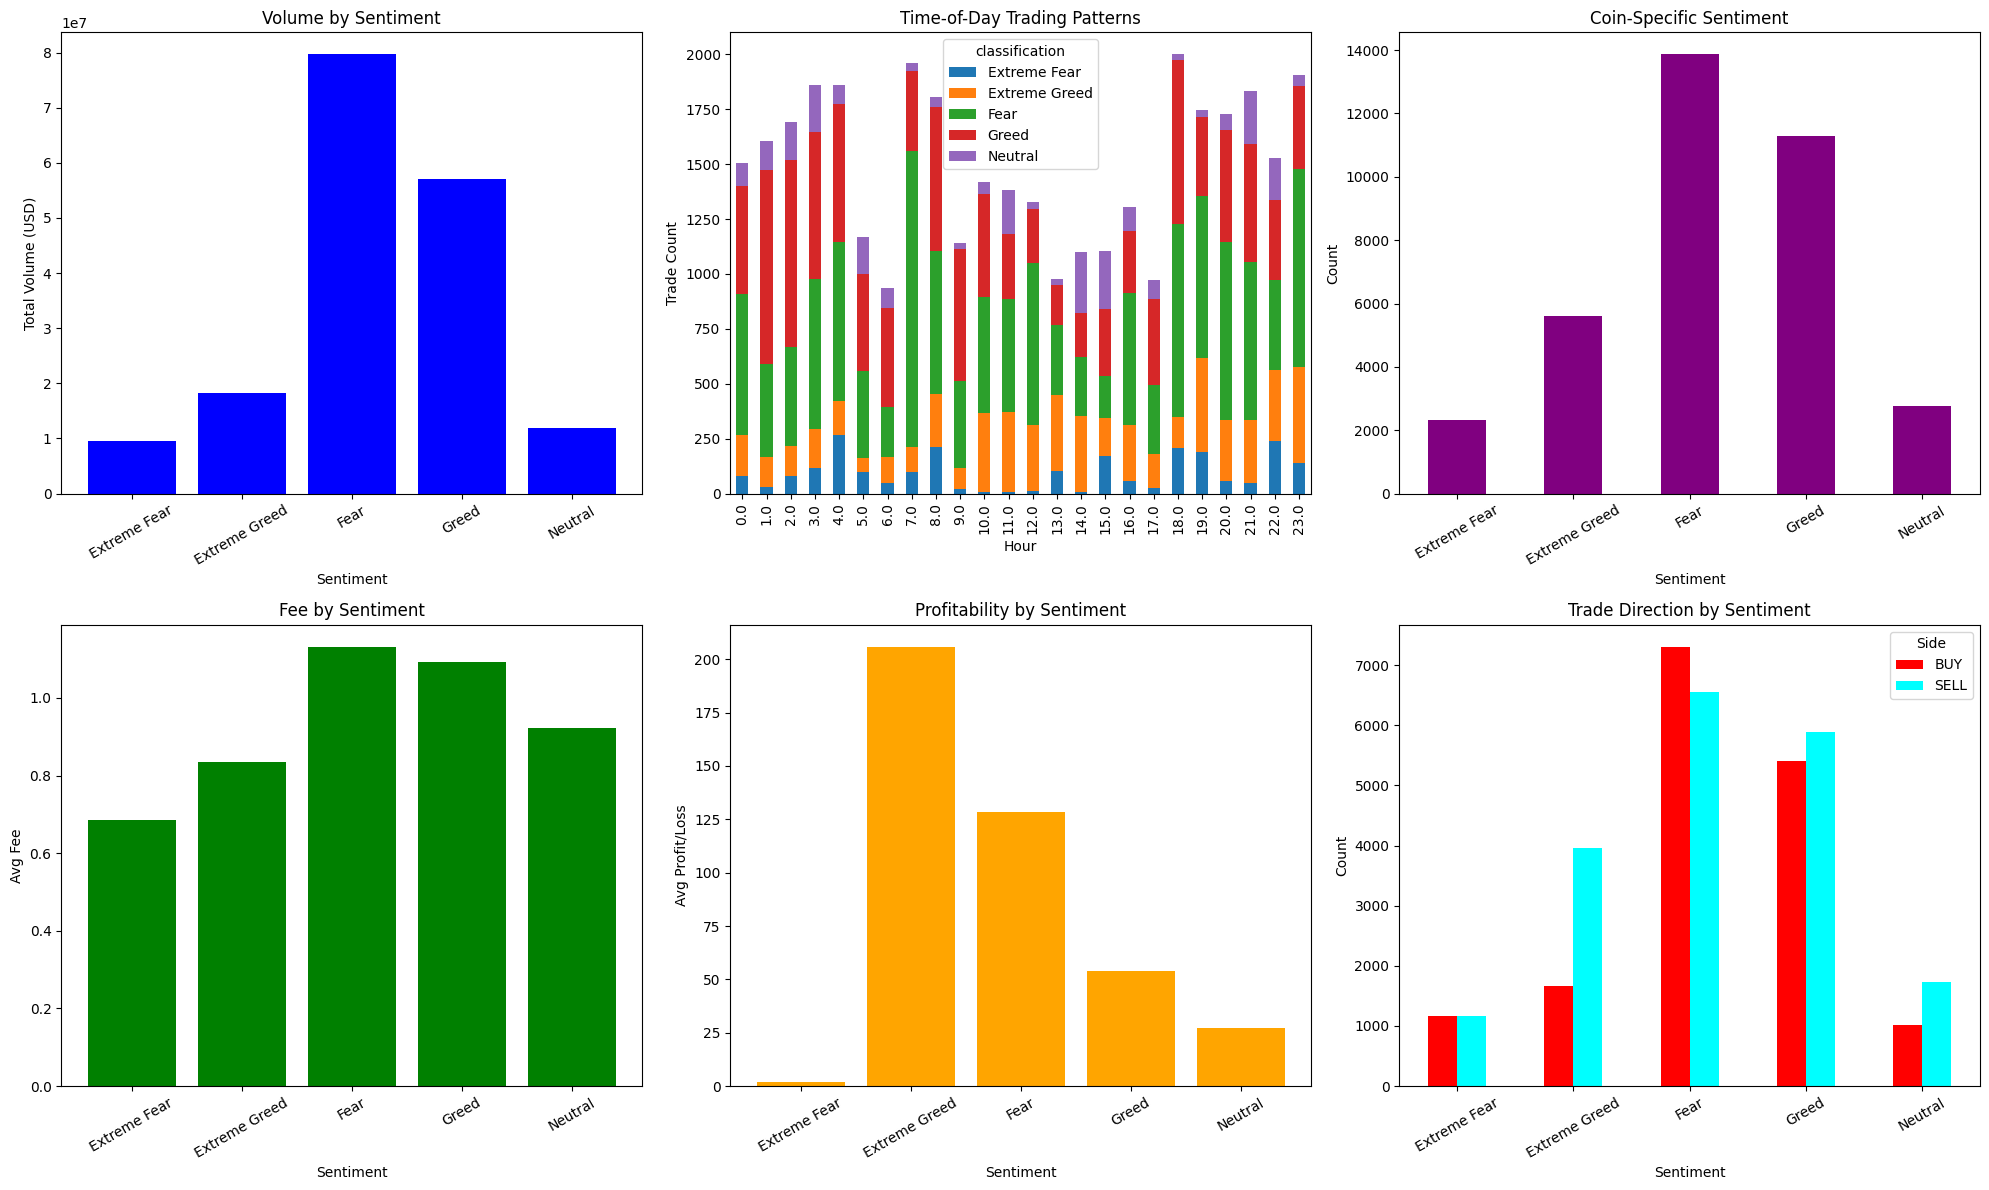

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(20,12))

if 'classification' in merged.columns and 'Size USD' in merged.columns:
    volume_by_sentiment = merged.groupby('classification')['Size USD'].sum().reset_index()
    axs[0,0].bar(volume_by_sentiment['classification'], volume_by_sentiment['Size USD'], color='blue')
    axs[0,0].set_title('Volume by Sentiment')
    axs[0,0].set_xlabel('Sentiment')
    axs[0,0].set_ylabel('Total Volume (USD)')
    axs[0,0].tick_params(axis='x', rotation=30)

if 'hour' in merged.columns and 'classification' in merged.columns:
    hour_sentiment = merged.groupby(['hour', 'classification']).size().unstack(fill_value=0)
    hour_sentiment.plot(ax=axs[0,1], kind='bar', stacked=True)
    axs[0,1].set_title('Time-of-Day Trading Patterns')
    axs[0,1].set_xlabel('Hour')
    axs[0,1].set_ylabel('Trade Count')

if 'Coin' in merged.columns and 'classification' in merged.columns:
    coin_sentiment = merged.groupby(['Coin', 'classification']).size().unstack(fill_value=0)
    coin_sentiment.sum().plot(kind='bar', ax=axs[0,2], color='purple')
    axs[0,2].set_title('Coin-Specific Sentiment')
    axs[0,2].set_xlabel('Sentiment')
    axs[0,2].set_ylabel('Count')
    axs[0,2].tick_params(axis='x', rotation=30)

if 'Fee' in merged.columns and 'classification' in merged.columns:
    fee_by_sentiment = merged.groupby('classification')['Fee'].mean().reset_index()
    axs[1,0].bar(fee_by_sentiment['classification'], fee_by_sentiment['Fee'], color='green')
    axs[1,0].set_title('Fee by Sentiment')
    axs[1,0].set_xlabel('Sentiment')
    axs[1,0].set_ylabel('Avg Fee')
    axs[1,0].tick_params(axis='x', rotation=30)


if 'Closed PnL' in merged.columns and 'classification' in merged.columns:
    pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean().reset_index()
    axs[1,1].bar(pnl_by_sentiment['classification'], pnl_by_sentiment['Closed PnL'], color='orange')
    axs[1,1].set_title('Profitability by Sentiment')
    axs[1,1].set_xlabel('Sentiment')
    axs[1,1].set_ylabel('Avg Profit/Loss')
    axs[1,1].tick_params(axis='x', rotation=30)


if 'Side' in merged.columns and 'classification' in merged.columns:
    direction_by_sentiment = merged.groupby(['classification', 'Side']).size().unstack(fill_value=0)
    direction_by_sentiment.plot(kind='bar', ax=axs[1,2], color=['red', 'cyan'])
    axs[1,2].set_title('Trade Direction by Sentiment')
    axs[1,2].set_xlabel('Sentiment')
    axs[1,2].set_ylabel('Count')
    axs[1,2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

## Smart Trading Strategies Based on Sentiment and Trade Data


Trade only during 'Greed' and 'Extreme Greed' sentiment And Avoid trading during 'Extreme Fear'

In [18]:
strategy_results = []

greed_trades = merged[merged['classification'].isin(['Greed', 'Extreme Greed'])]
greed_profit = greed_trades['Closed PnL'].mean() if 'Closed PnL' in greed_trades.columns else None
strategy_results.append({'Strategy': 'Trade during Greed/Extreme Greed', 'Avg Profit': greed_profit, 'Trade Count': len(greed_trades)})
 
no_fear_trades = merged[~merged['classification'].isin(['Extreme Fear'])]
no_fear_profit = no_fear_trades['Closed PnL'].mean() if 'Closed PnL' in no_fear_trades.columns else None
strategy_results.append({'Strategy': 'Avoid Extreme Fear', 'Avg Profit': no_fear_profit, 'Trade Count': len(no_fear_trades)})

Trade only coins with highest positive sentiment counts and at hours with highest sentiment counts

In [19]:
if 'Coin' in merged.columns:
    coin_sentiment_sum = merged.groupby(['Coin', 'classification']).size().unstack(fill_value=0)
    top_coin = coin_sentiment_sum['Greed'].idxmax() if 'Greed' in coin_sentiment_sum.columns else coin_sentiment_sum.sum(axis=1).idxmax()
    top_coin_trades = merged[merged['Coin'] == top_coin]
    top_coin_profit = top_coin_trades['Closed PnL'].mean() if 'Closed PnL' in top_coin_trades.columns else None
    strategy_results.append({'Strategy': f'Trade top coin: {top_coin}', 'Avg Profit': top_coin_profit, 'Trade Count': len(top_coin_trades)})
 
if 'hour' in merged.columns:
    hour_sentiment_sum = merged.groupby(['hour', 'classification']).size().unstack(fill_value=0)
    best_hour = hour_sentiment_sum.sum(axis=1).idxmax()
    best_hour_trades = merged[merged['hour'] == best_hour]
    best_hour_profit = best_hour_trades['Closed PnL'].mean() if 'Closed PnL' in best_hour_trades.columns else None
    strategy_results.append({'Strategy': f'Trade at best hour: {best_hour}', 'Avg Profit': best_hour_profit, 'Trade Count': len(best_hour_trades)})

In [20]:
if 'Side' in merged.columns and 'Closed PnL' in merged.columns:
    side_profit = merged.groupby('Side')['Closed PnL'].mean()
    best_side = side_profit.idxmax()
    best_side_trades = merged[merged['Side'] == best_side]
    best_side_profit = best_side_trades['Closed PnL'].mean()
    strategy_results.append({'Strategy': f'Trade {best_side} only', 'Avg Profit': best_side_profit, 'Trade Count': len(best_side_trades)})

strategy_df = pd.DataFrame(strategy_results)
print(strategy_df)
strategy_df.to_csv('/content/drive/MyDrive/ds_Yatendra/csv_files/strategy_results.csv',sep='\t',index=True)

                           Strategy  Avg Profit  Trade Count
0  Trade during Greed/Extreme Greed  104.447834        16913
1                Avoid Extreme Fear   49.270740       208898
2              Trade top coin: @107   92.821850        29992
3          Trade at best hour: 18.0   73.799320         3408
4                   Trade SELL only   60.713803       108528


## Time Series Analysis

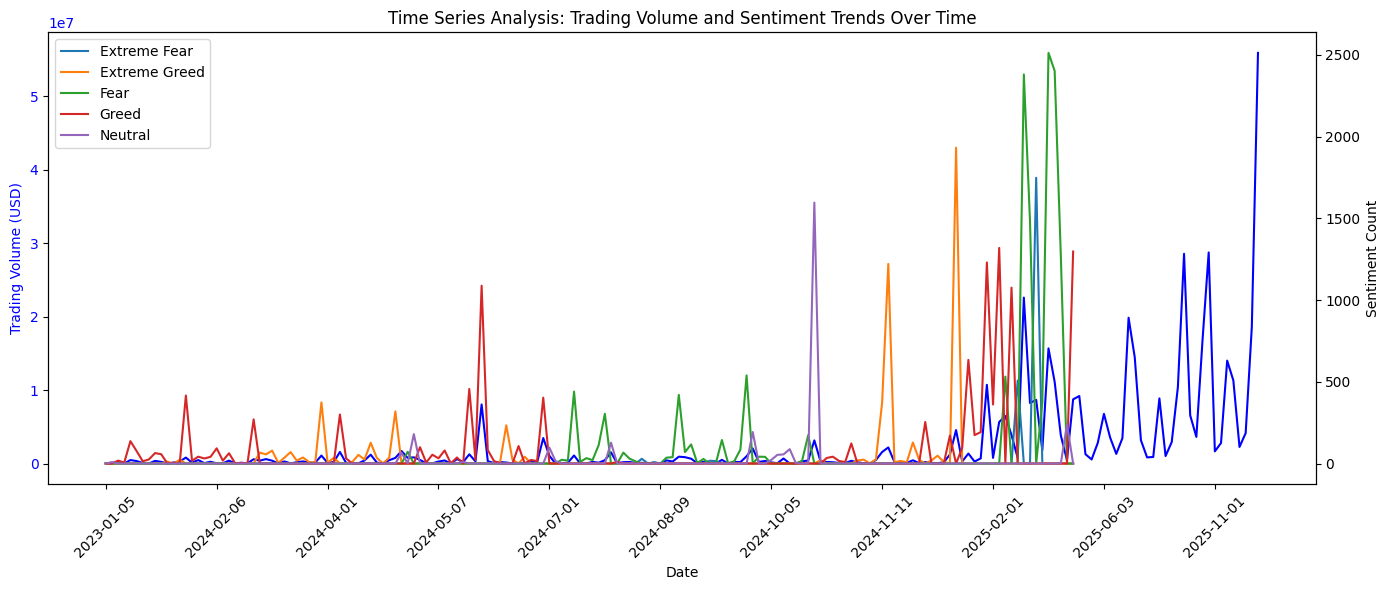

In [21]:

volume_by_date = merged.groupby('date')['Size USD'].sum().reset_index()

sentiment_by_date = merged.groupby(['date', 'classification']).size().unstack(fill_value=0)

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(volume_by_date['date'], volume_by_date['Size USD'], color='blue', label='Trading Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Trading Volume (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(volume_by_date['date'][::max(1, len(volume_by_date)//10)])
ax1.set_xticklabels(volume_by_date['date'][::max(1, len(volume_by_date)//10)], rotation=45)


ax2 = ax1.twinx()
for sentiment in sentiment_by_date.columns:
    ax2.plot(sentiment_by_date.index, sentiment_by_date[sentiment], label=sentiment)
ax2.set_ylabel('Sentiment Count')
ax2.legend(loc='upper left')

plt.title('Time Series Analysis: Trading Volume and Sentiment Trends Over Time')
plt.tight_layout()
plt.show()

# Other Sentiment Metrics in Subplots

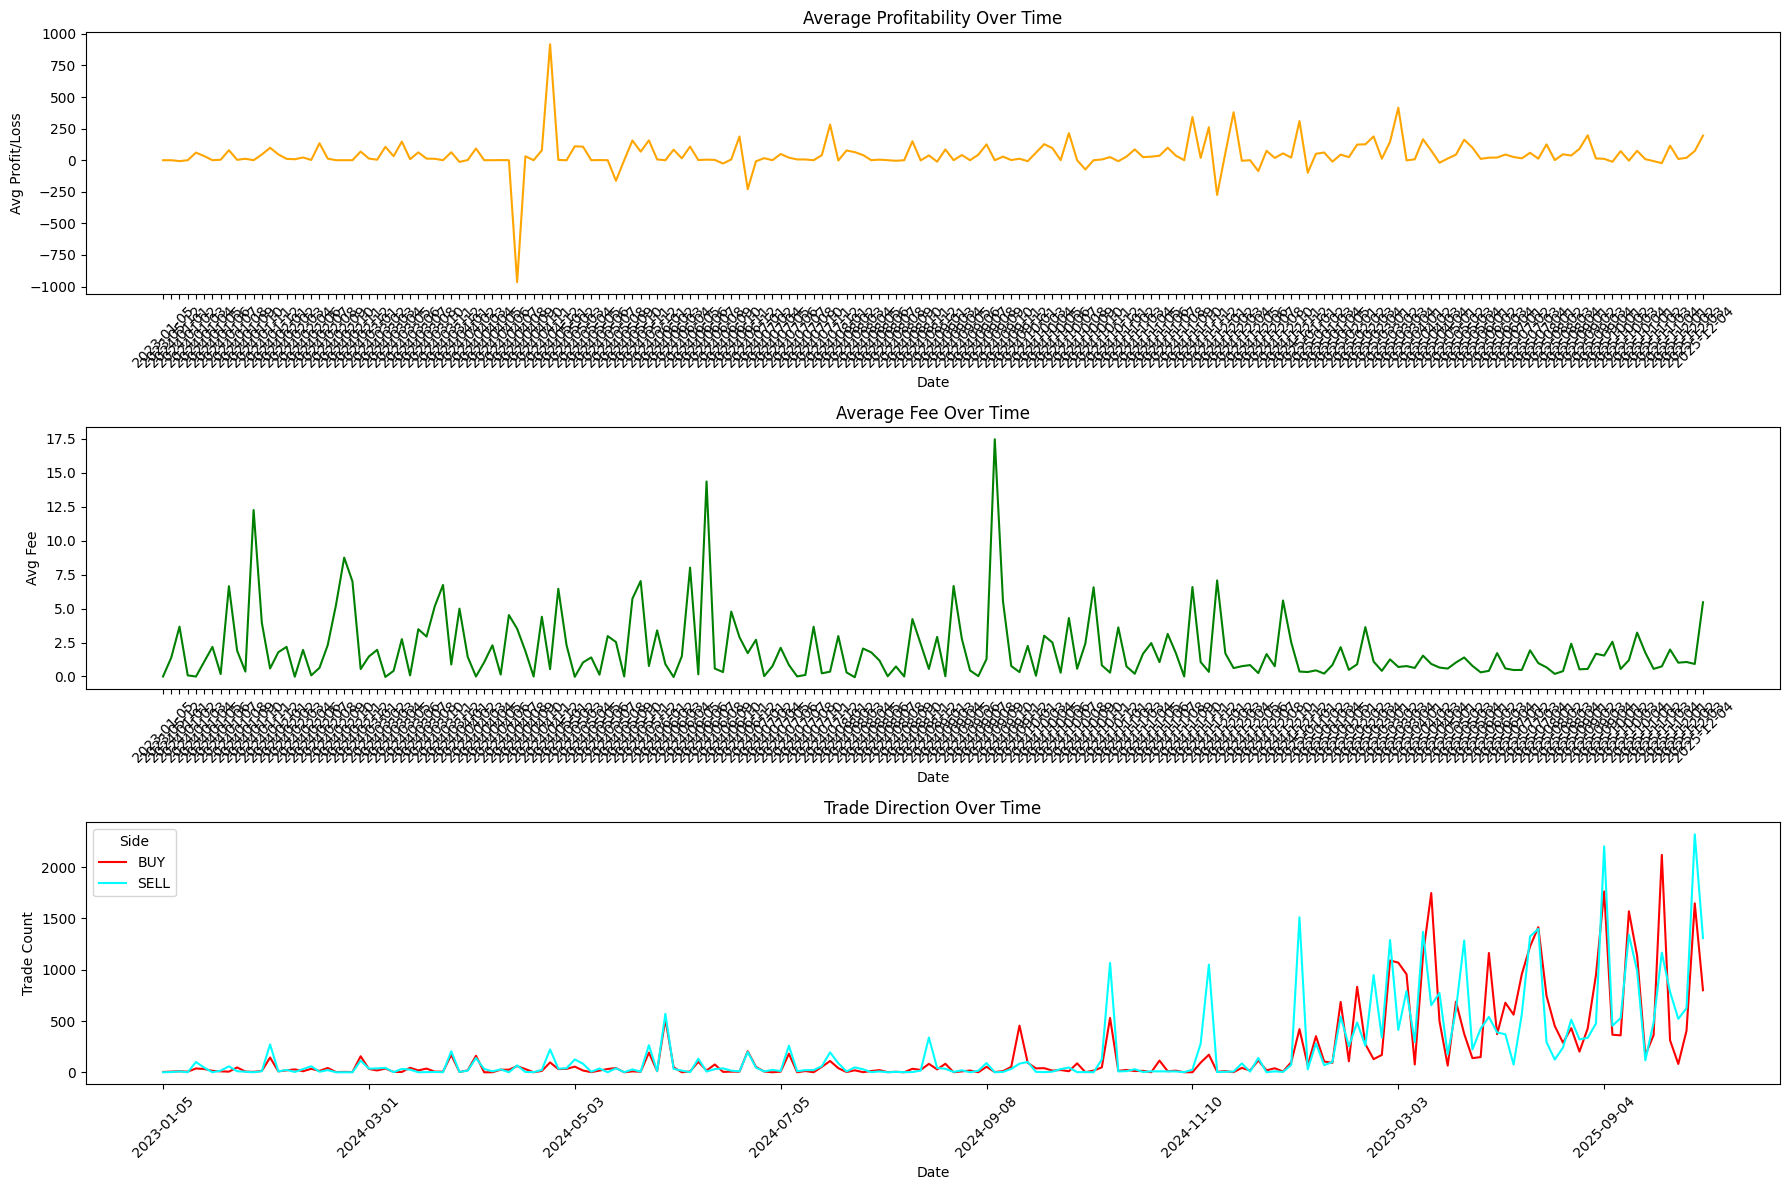

In [31]:
fig, axs = plt.subplots(3, 1, figsize=(18, 12))
if 'Closed PnL' in merged.columns:
    pnl_by_date = merged.groupby('date')['Closed PnL'].mean().reset_index()
    axs[0].plot(pnl_by_date['date'], pnl_by_date['Closed PnL'], color='orange')
    axs[0].set_title('Average Profitability Over Time')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Avg Profit/Loss')
    axs[0].tick_params(axis='x', rotation=45)

if 'Fee' in merged.columns:
    fee_by_date = merged.groupby('date')['Fee'].mean().reset_index()
    axs[1].plot(fee_by_date['date'], fee_by_date['Fee'], color='green')
    axs[1].set_title('Average Fee Over Time')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Avg Fee')
    axs[1].tick_params(axis='x', rotation=45)

if 'Side' in merged.columns:
    direction_by_date = merged.groupby(['date', 'Side']).size().unstack(fill_value=0)
    direction_by_date.plot(ax=axs[2], title='Trade Direction Over Time', color=['red', 'cyan'])
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Trade Count')
    axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()